In [62]:
pip install matplotlib, pandas, openpyxl, scikit-learn, plotly, --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'matplotlib,'

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Dimensionality Reduction: Principal Component Analysis

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

In [64]:
encoded_data = pd.read_excel('Datasets/Encoded_Data_for_Model_Training_2.xlsx')

In [65]:
encoded_data.head(3)

,age,income,gender_female,gender_male,gender_non binary,ethnicity_hispanic,ethnicity_non hispanic,race_Colombia,race_Mexican,race_Puerto Rican,...,language_both,language_english,language_spanish,language_undisclosed,disability_i do not have a disability,disability_undisclosed,choice_Empathetic,choice_Original,choice_Persuasive,choice_Simplier
0,3,1,True,False,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
1,0,0,False,True,False,True,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
2,1,0,True,False,False,False,True,False,False,False,...,False,True,False,False,True,False,False,True,False,False


## Standardize the data

In [66]:
scaler = StandardScaler()
encoded_scaled = scaler.fit_transform(encoded_data)
# encoded_data = encoded_scaled

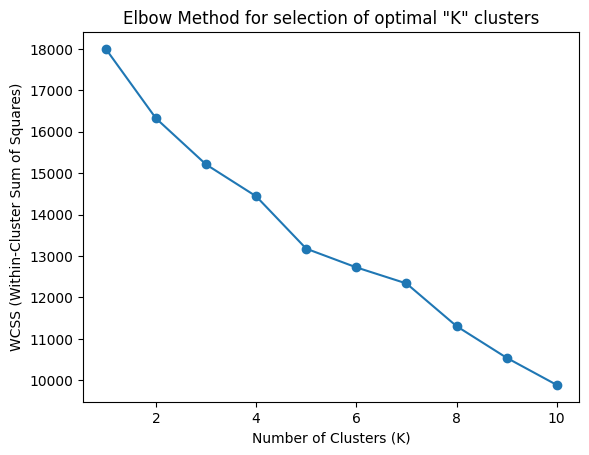

In [67]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(encoded_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plotting the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for selection of optimal "K" clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

For n_clusters = 2, the average silhouette score is: 0.10875336728887439
For n_clusters = 3, the average silhouette score is: 0.09667995990455043


For n_clusters = 4, the average silhouette score is: 0.11611417110398888
For n_clusters = 5, the average silhouette score is: 0.1374620407745316
For n_clusters = 6, the average silhouette score is: 0.11111760406973534
For n_clusters = 7, the average silhouette score is: 0.11110510210758312


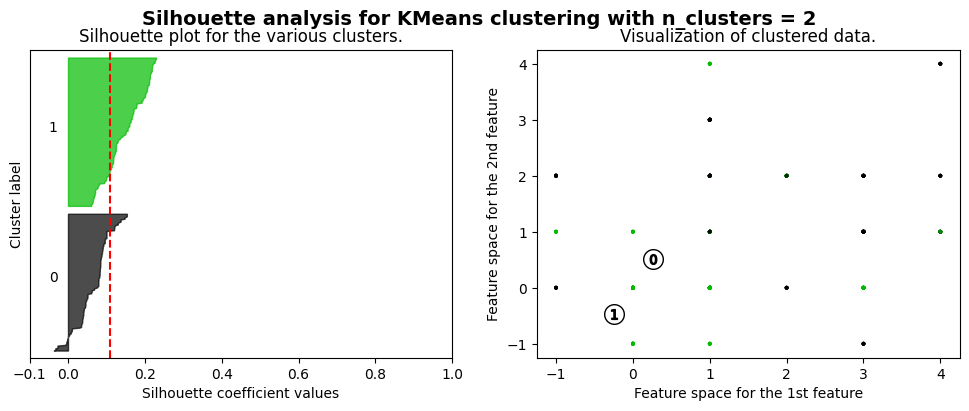

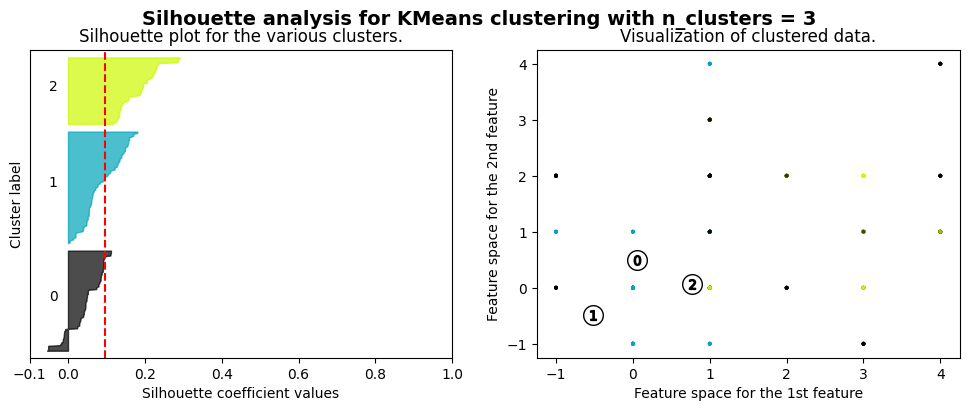

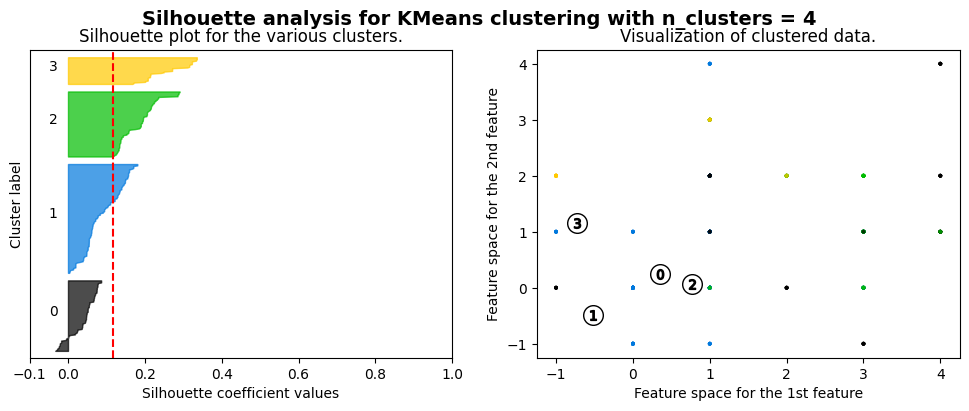

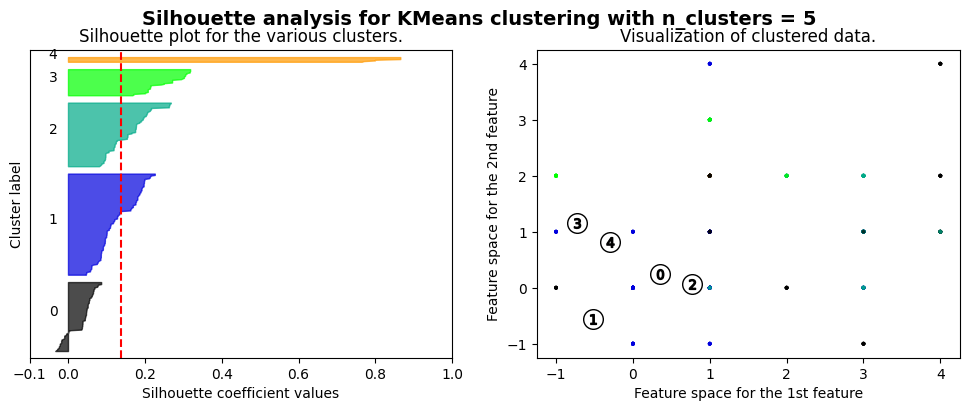

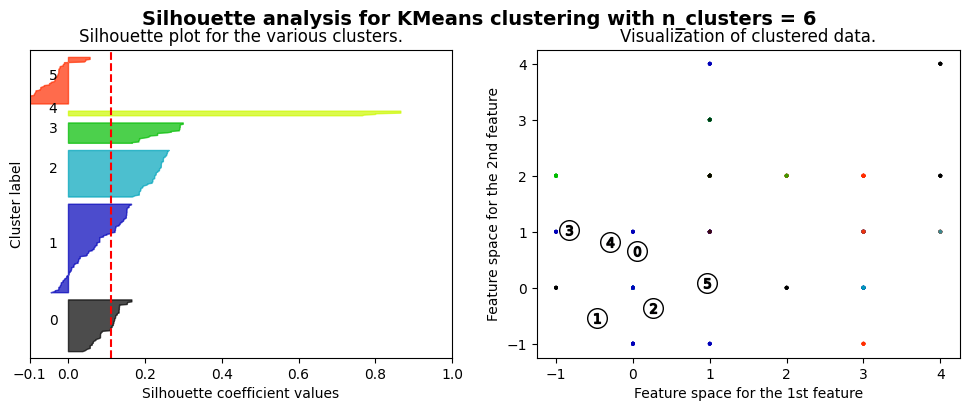

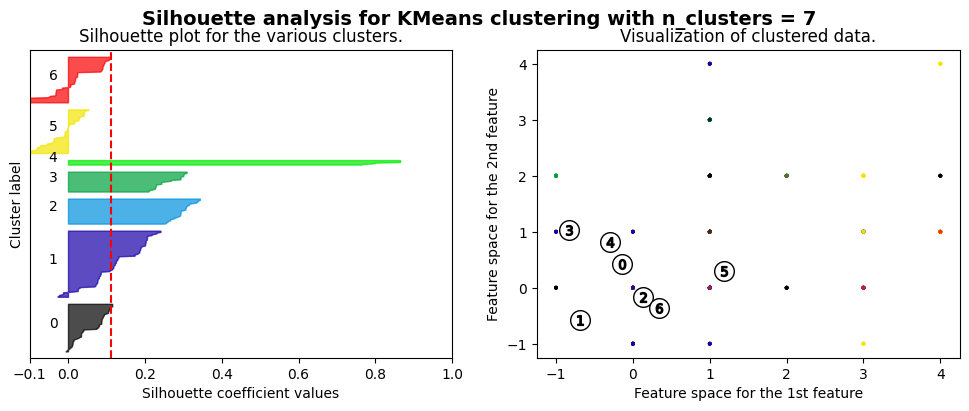

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import matplotlib.pyplot as plt

# Range of cluster numbers (K) to evaluate
range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(encoded_data) + (n_clusters + 1) * 10])

    # Initialize the KMeans object and fit it to the data
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(encoded_scaled)

    # Compute the silhouette score for the current clustering
    silhouette_avg = silhouette_score(encoded_scaled, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is: {silhouette_avg}")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(encoded_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(encoded_data.iloc[:, 0], encoded_data.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("Visualization of clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


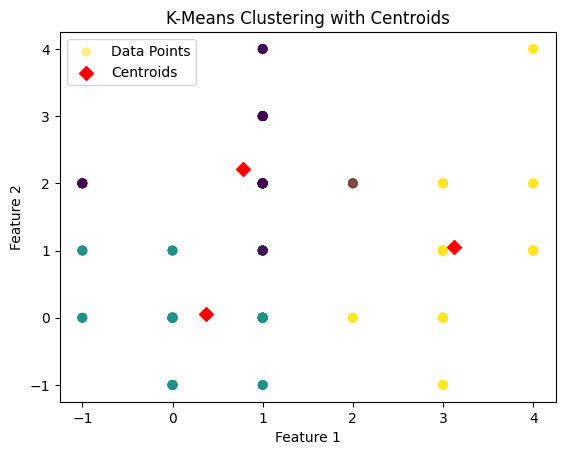

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(encoded_data)
# Scatter plot of data points
plt.scatter(encoded_data.iloc[:, 0], encoded_data.iloc[:, 1], c=cluster_labels, alpha=0.5, label='Data Points')

# Scatter plot of centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='D', s=50, c='red', label='Centroids')

# Show the plot
plt.legend()
plt.title('K-Means Clustering with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [70]:
# Image will be displayed in the readme file as well
import plotly.express as px

# Scatter plot of data points
fig = px.scatter(x=encoded_data.iloc[:, 0], y=encoded_data.iloc[:, 1], color=cluster_labels, opacity=0.5, labels={'x': 'PCA Feature 1', 'y': 'PCA Feature 2'}, title='K-Means Clustering with Centroids', template='plotly_white')

# Scatter plot of centroids
fig.add_scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], mode='markers', marker=dict(symbol='diamond', size=10, color='red'), name='Centroids')

fig.show()